In [1]:
# Imports and scripts
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pathmagic
%matplotlib inline
with pathmagic.context():
    import Preprocess as Prep
    import RelativePaths as RP
    import Evaluation as Eva
    import GatherData as Gather
    import Graphs
    import Utils

systems = ['jabref','prom','team']

[nltk_data] Downloading package stopwords to /home/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# File containing settings
path_to_yaml = '../config.yaml'
config = Utils.read_yaml_file(path_to_yaml)
files = []
dfs = [] # Order: [jabref, prom , team]
df_total = None
for system in systems:
    files.append(config['file locations'][system]['preprocess comparisons'])
    dfs.append(pd.read_csv("../" + config['file locations'][system]['preprocess comparisons']))
    
jabref_bow = dfs[0].loc[dfs[0]['Feature rep.'].isin(['Bag-of-words'])]
jabref_tfidf = dfs[0].loc[dfs[0]['Feature rep.'].isin(['TF-IDF'])]

prom_bow = dfs[1].loc[dfs[1]['Feature rep.'].isin(['Bag-of-words'])]
prom_tfidf = dfs[1].loc[dfs[1]['Feature rep.'].isin(['TF-IDF'])]

team_bow = dfs[2].loc[dfs[2]['Feature rep.'].isin(['Bag-of-words'])]
team_tfidf = dfs[2].loc[dfs[2]['Feature rep.'].isin(['TF-IDF'])]


In [3]:
df_temp = [dfs[0], dfs[1], dfs[2]]
df_all = pd.concat(df_temp)
df_all.sort_values(by='macro_f1',ascending=[False]).head(20)

,classifier,setting_id,Feature rep.,settings,accuracy,macro_precision,macro_recall,weighted_precision,weighted_recall,macro_f1,weighted_f1,train_size,test_size,report_table
24,MaxEnt,s4,Bag-of-words,"[['lib', 'tow', 'jk', 'scw', 'lc', 'sw', 'stem...",0.906915,0.896190,0.795971,0.923808,0.906915,0.805868,0.908873,83,752,GUI LOGIC MODEL ...
28,SVM,s4,TF-IDF,"[['lib', 'tow', 'jk', 'scw', 'lc', 'sw', 'stem...",0.867305,0.805599,0.788962,0.888273,0.867305,0.781560,0.874029,81,731,Client Common Logic ...
3,MaxEnt,s0,TF-IDF,"[['lib', 'tow', 'jk', 'scw', 'lc', 'stem'], ['...",0.824147,0.823021,0.778691,0.834690,0.824147,0.779200,0.823909,84,762,basicutils-6.9.126 graphviz-6.9.25...
29,Naive-Bayes,s4,TF-IDF,"[['lib', 'tow', 'jk', 'scw', 'lc', 'sw', 'stem...",0.826772,0.842253,0.771767,0.833810,0.826772,0.774999,0.823956,84,762,basicutils-6.9.126 graphviz-6.9.25...
27,MaxEnt,s4,TF-IDF,"[['lib', 'tow', 'jk', 'scw', 'lc', 'sw', 'stem...",0.820210,0.793294,0.775907,0.828923,0.820210,0.772575,0.820100,84,762,basicutils-6.9.126 graphviz-6.9.25...
27,MaxEnt,s4,TF-IDF,"[['lib', 'tow', 'jk', 'scw', 'lc', 'sw', 'stem...",0.879617,0.762061,0.811590,0.903012,0.879617,0.771807,0.886041,81,731,Client Common Logic ...
3,MaxEnt,s0,TF-IDF,"[['lib', 'tow', 'jk', 'scw', 'lc', 'stem'], ['...",0.879617,0.772628,0.784482,0.892176,0.879617,0.771661,0.881915,81,731,Client Common Logic ...
5,Naive-Bayes,s0,TF-IDF,"[['lib', 'tow', 'jk', 'scw', 'lc', 'stem'], ['...",0.828084,0.832851,0.749930,0.834227,0.828084,0.759996,0.825552,84,762,basicutils-6.9.126 graphviz-6.9.25...
28,SVM,s4,TF-IDF,"[['lib', 'tow', 'jk', 'scw', 'lc', 'sw', 'stem...",0.826772,0.852862,0.739003,0.854327,0.826772,0.756146,0.826633,84,762,basicutils-6.9.126 graphviz-6.9.25...
9,MaxEnt,s1,TF-IDF,"[['lib', 'tow', 'scw', 'jk', 'lc', 'stem'], ['...",0.857729,0.757266,0.759810,0.867498,0.857729,0.750943,0.859850,81,731,Client Common Logic ...


In [4]:
jabref_bow = jabref_bow.drop(labels={'settings'}, axis=1)
jabref_bow = jabref_bow.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

j_acc = jabref_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
j_acc['metric'] = 'accuracy'

j_prc = jabref_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
j_prc['metric'] = 'precision'

j_recall = jabref_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
j_recall['metric'] = 'recall'


j_f1 = jabref_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
j_f1['metric'] = 'f1'


df_vis1 = pd.concat([j_acc,j_prc, j_recall], ignore_index = True)
df_vis2 = pd.concat([j_recall, j_f1], ignore_index = True)

<Figure size 360x360 with 0 Axes>

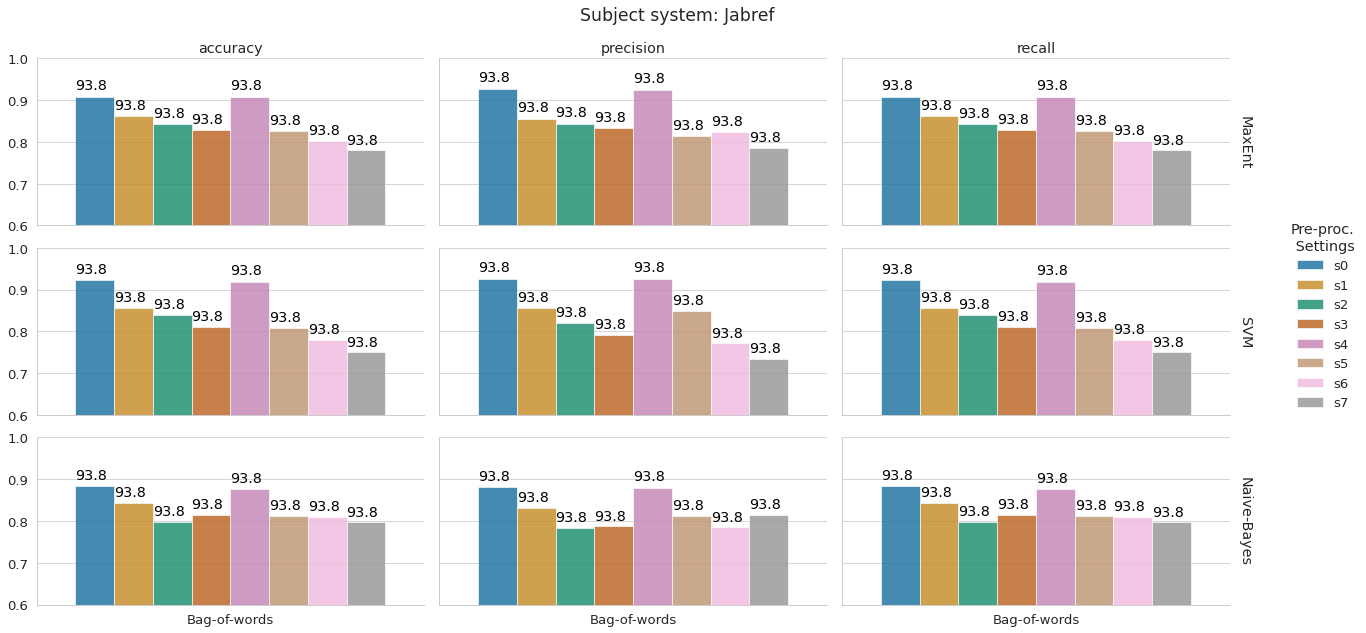

In [121]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis1,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=2,
                margin_titles=True)
g.set(ylim=(0.6, 1.00))
g.set_axis_labels("", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: Jabref')

#for p in g.fig.ax.patches:
#    _x = (p.get_x() + p.get_width())/2
#    _y = p.get_y() + p.get_height()
#    value = int(p.get_width())
#    ax.text(_x, _y, value, ha="left")

axes = []
for x in range(3):
    for y in range(3):
        axes.append(g.facet_axis(x,y))
        
for ax in axes:
    for p in ax.patches:
        ax.text(p.get_x(), 
                p.get_height() * 1.02, 
               '{0:.1f}'.format(93.8),
                color='black', 
                rotation='horizontal', 
                size='medium')


In [ ]:
prom_bow = prom_bow.drop(labels={'settings'}, axis=1)
prom_bow = prom_bow.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

p_acc = prom_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
p_acc['metric'] = 'accuracy'

p_prc = prom_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
p_prc['metric'] = 'precision'

p_recall = prom_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
p_recall['metric'] = 'recall'


p_f1 = prom_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
p_f1['metric'] = 'f1'


df_vis = pd.concat([p_acc,p_prc, p_recall, p_f1], ignore_index = True)
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=1.25,
                margin_titles=True)
g.set(ylim=(0.4, 1.00))
g.set_axis_labels(" ", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: Prom')

In [ ]:
team_bow = team_bow.drop(labels={'settings'}, axis=1)
team_bow = team_bow.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

t_acc = team_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
t_acc['metric'] = 'accuracy'

t_prc = team_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
t_prc['metric'] = 'precision'

t_recall = team_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
t_recall['metric'] = 'recall'


t_f1 = team_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
t_f1['metric'] = 'f1'


df_vis = pd.concat([t_acc,t_prc, t_recall, t_f1], ignore_index = True)
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=1.25,
                margin_titles=True)
g.set(ylim=(0.4, 1.00))
g.set_axis_labels(" ", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: teammates')

# TF-IDF

In [ ]:
jabref_bow = jabref_tfidf.drop(labels={'settings'}, axis=1)
jabref_bow = jabref_tfidf.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

j_acc = jabref_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
j_acc['metric'] = 'accuracy'

j_prc = jabref_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
j_prc['metric'] = 'precision'

j_recall = jabref_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
j_recall['metric'] = 'recall'


j_f1 = jabref_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
j_f1['metric'] = 'f1'


df_vis1 = pd.concat([j_acc,j_prc, j_recall, j_f1], ignore_index = True)
df_vis2 = pd.concat([j_recall, j_f1], ignore_index = True)
sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis1,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=1.25,
                margin_titles=True)
g.set(ylim=(0.4, 1.00))
g.set_axis_labels(" ", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: Jabref')

In [ ]:
prom_bow = prom_tfidf.drop(labels={'settings'}, axis=1)
prom_bow = prom_tfidf.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

p_acc = prom_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
p_acc['metric'] = 'accuracy'

p_prc = prom_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
p_prc['metric'] = 'precision'

p_recall = prom_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
p_recall['metric'] = 'recall'


p_f1 = prom_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
p_f1['metric'] = 'f1'


df_vis = pd.concat([p_acc,p_prc, p_recall, p_f1], ignore_index = True)
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=1.25,
                margin_titles=True)
g.set(ylim=(0.4, 1.00))
g.set_axis_labels(" ", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: Prom')

In [ ]:
team_bow = team_tfidf.drop(labels={'settings'}, axis=1)
team_bow = team_tfidf.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

t_acc = team_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
t_acc['metric'] = 'accuracy'

t_prc = team_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
t_prc['metric'] = 'precision'

t_recall = team_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
t_recall['metric'] = 'recall'


t_f1 = team_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
t_f1['metric'] = 'f1'


df_vis = pd.concat([t_acc,t_prc, t_recall, t_f1], ignore_index = True)
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=1.25,
                margin_titles=True)
g.set(ylim=(0.4, 1.00))
g.set_axis_labels(" ", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: teammates')